In [1]:
import tensorflow as TF

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from tensorflow import keras

In [3]:
heart_df = pd.read_table("heart_failure_clinical_records_dataset.csv", header = 0, delimiter = ",")
columns_to_normalize = ["creatinine_phosphokinase","ejection_fraction", "platelets", "serum_creatinine","serum_sodium"]
heart_df[columns_to_normalize] = heart_df[columns_to_normalize].apply(lambda x: (x - min(x))/(max(x)-min(x)))

In [3]:
heart_df.sample(n=5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
298,50.0,0,0.022072,0,0.469697,0,0.448418,0.123596,0.657143,1,1,285,0
101,75.0,0,0.071319,0,0.469697,1,0.288833,0.076404,0.685714,1,0,87,0
283,65.0,0,0.212427,0,0.363636,0,0.288833,0.067416,0.714286,1,1,250,0
153,50.0,0,0.232585,1,0.318182,0,0.288833,0.076404,0.685714,1,1,119,0
83,79.0,1,0.004083,0,0.545455,1,0.178082,0.146067,0.571429,1,0,78,0


In [17]:
sums = heart_df[["sex","smoking","anaemia","diabetes","high_blood_pressure","DEATH_EVENT"]].sum()
print(sums)

sex                    194
smoking                 96
anaemia                129
diabetes               125
high_blood_pressure    105
DEATH_EVENT             96
dtype: int64


heart_df.insert(loc = 1, column ="column_to_delete", value=0)# dodawanie nowej kolumny na pozycji 1 o wartosciach 0
heart_df.drop(["column_to_delete"], axis="columns", inplace=True) # inplace = true oznacza usuniecie kolumny w danym dataframie jesli inplace=false to tworzy nowy df bez tej kolumny

In [41]:
heart_df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,0.071299,0.418060,0.364903,0.351171,0.288833,0.100436,0.675012,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,0.123793,0.494067,0.179316,0.478136,0.118565,0.116237,0.126071,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,0.011929,0.000000,0.242424,0.000000,0.227179,0.044944,0.600000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,0.028961,0.000000,0.363636,0.000000,0.287186,0.067416,0.685714,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,0.071319,1.000000,0.469697,1.000000,0.337495,0.101124,0.771429,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,285.000000,1.00000


<Axes: >

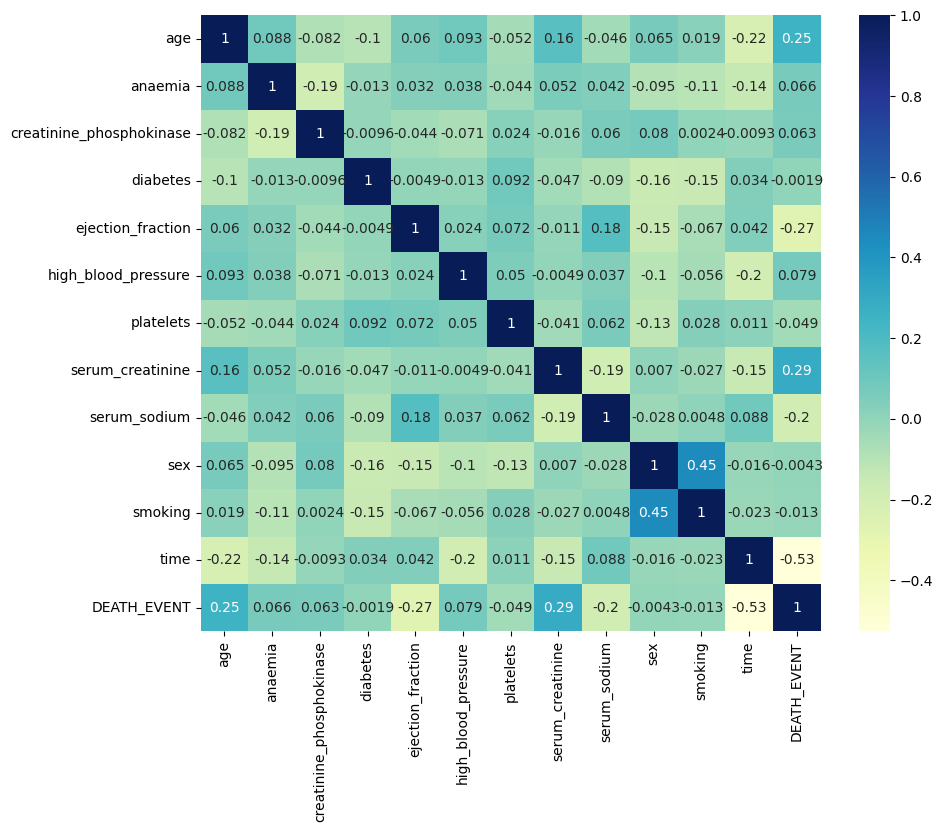

In [20]:
corr = heart_df.corr()
plt.figure(figsize = (10, 8))
sns.heatmap(corr, cmap = "YlGnBu", annot = True)

Text(0.5, 1.0, 'Distribution of AGE')

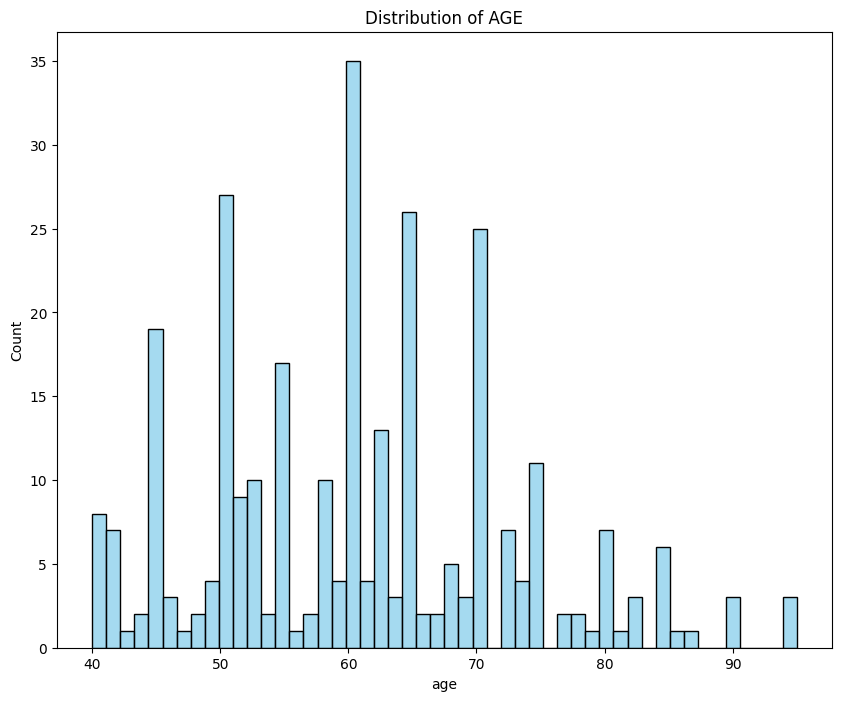

In [26]:
plt.figure(figsize = (10,8))
sns.histplot(heart_df["age"], bins = 50, color = "skyblue" )
plt.title("Distribution of AGE")

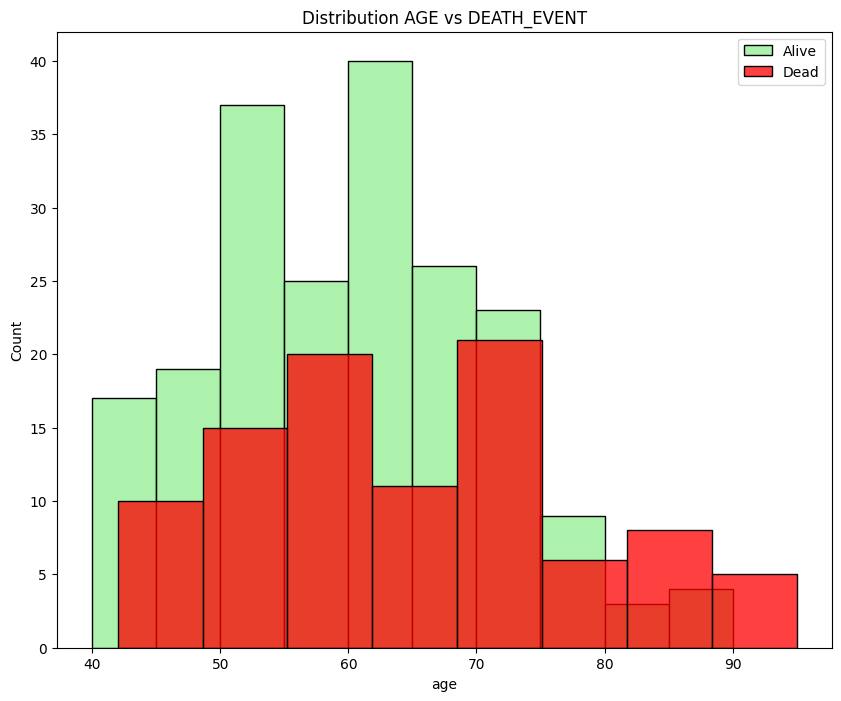

In [39]:
plt.figure(figsize = (10, 8))
filtered_data_alive = heart_df[heart_df["DEATH_EVENT"] == 0]
filtered_data_dead = heart_df[heart_df["DEATH_EVENT"] == 1]
sns.histplot(filtered_data_alive["age"], color = "lightgreen", label = "Alive")
sns. histplot(filtered_data_dead["age"], color = "red", label = "Dead" )
plt.title("Distribution AGE vs DEATH_EVENT")
plt.legend()

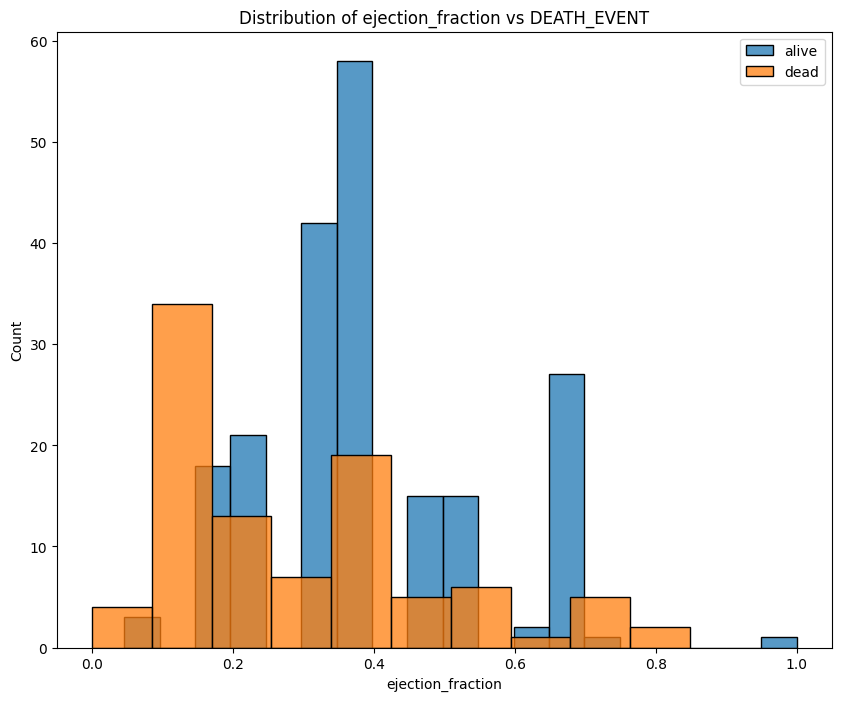

In [9]:
plt.figure(figsize = (10,8))
filtered_data_alive.head()
filtered_data_alive = heart_df[heart_df["DEATH_EVENT"] == 0]
filtered_data_dead = heart_df[heart_df["DEATH_EVENT"] == 1]
sns.histplot(filtered_data_alive["ejection_fraction"], label = "alive")
sns.histplot(filtered_data_dead["ejection_fraction"], label = "dead")
plt.title("Distribution of ejection_fraction vs DEATH_EVENT")
plt.legend()

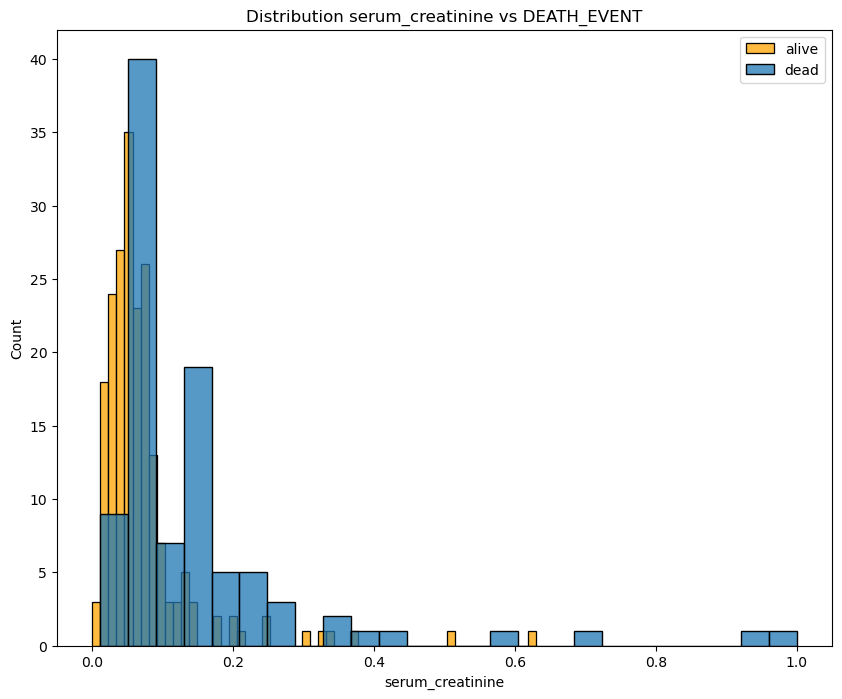

In [16]:
plt.figure(figsize = (10,8))
filtered_data_alive = heart_df[heart_df["DEATH_EVENT"] == 0]
filtered_data_dead = heart_df[heart_df["DEATH_EVENT"] == 1]
sns.histplot(filtered_data_alive["serum_creatinine"], label = "alive", color = "orange")
sns.histplot(filtered_data_dead["serum_creatinine"], label = "dead")
plt.title("Distribution serum_creatinine vs DEATH_EVENT")
plt.legend()

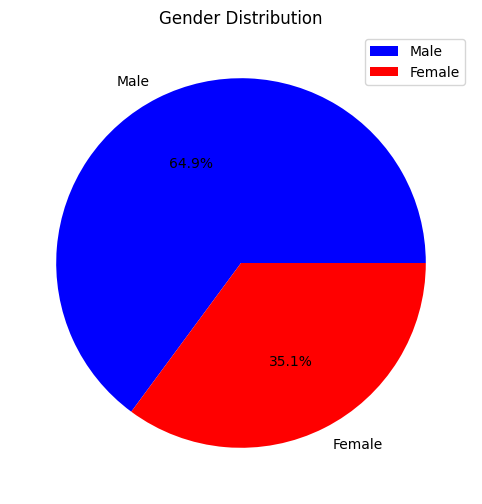

In [23]:
plt.figure(figsize = (9,6))
plt.pie(heart_df["sex"].value_counts(), labels= ("Male", "Female"), colors = ("blue", "red"), autopct = '%1.1f%%')
plt.title("Gender Distribution")
plt.legend()

Text(0.5, 1.0, 'high_blood_pressure Distribution')

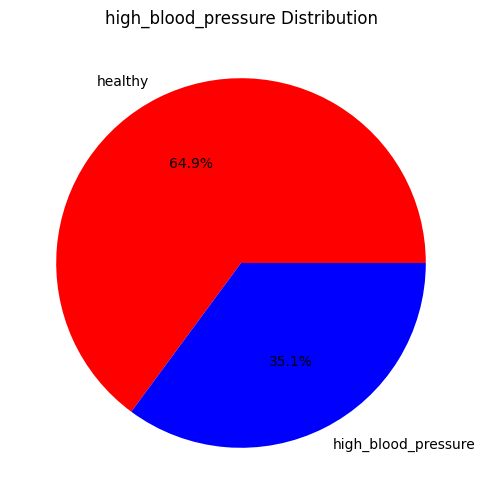

In [6]:
plt.figure(figsize = (9,6))
plt.pie(heart_df["high_blood_pressure"].value_counts(), colors = ("red","blue"), autopct ="%1.1f%%", labels =("healthy","high_blood_pressure"))
plt.title("high_blood_pressure Distribution")

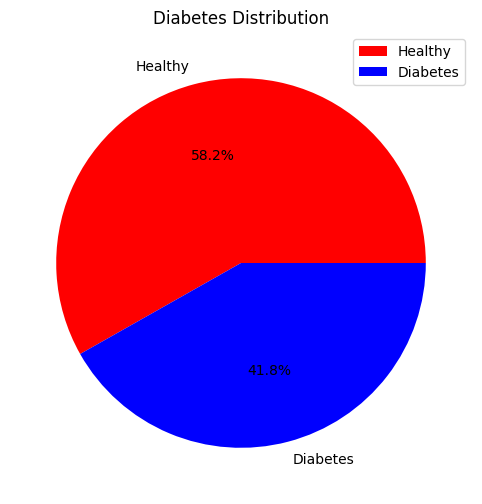

In [22]:
plt.figure(figsize = (9,6))
plt.pie(heart_df["diabetes"].value_counts(), colors = ("red", "blue"), autopct = '%1.1f%%', labels = ("Healthy", "Diabetes" ))
plt.title("Diabetes Distribution")
plt.legend()

Text(0.5, 1.0, 'Smoking Distribution')

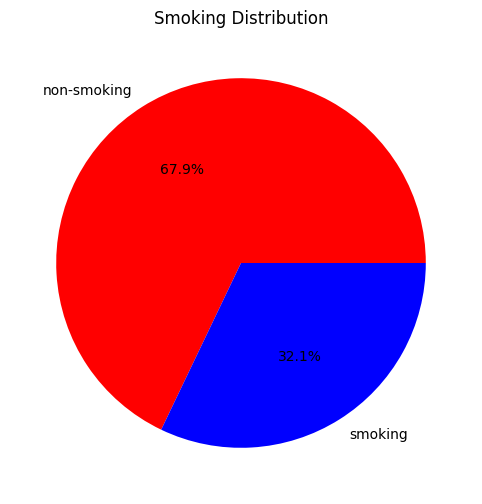

In [10]:
plt.figure(figsize= (9,6))
plt.pie(heart_df["smoking"].value_counts(), colors = ("red", "blue"), autopct = "%1.1f%%", labels = ("non-smoking","smoking"))
plt.title("Smoking Distribution")

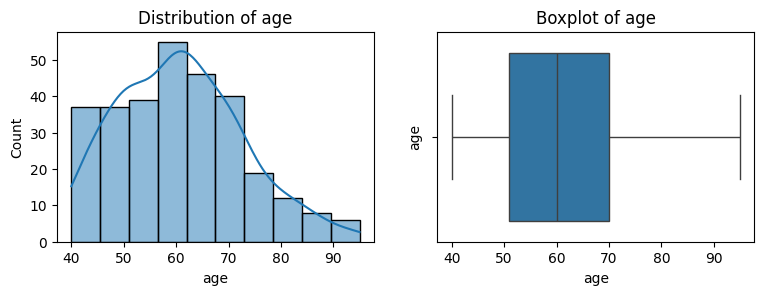

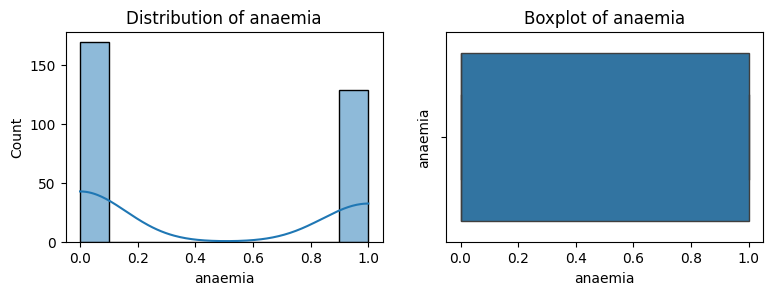

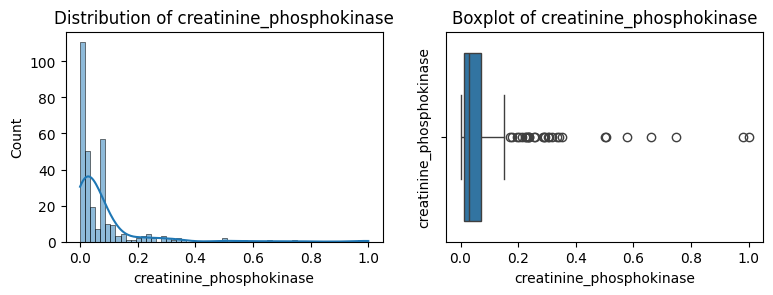

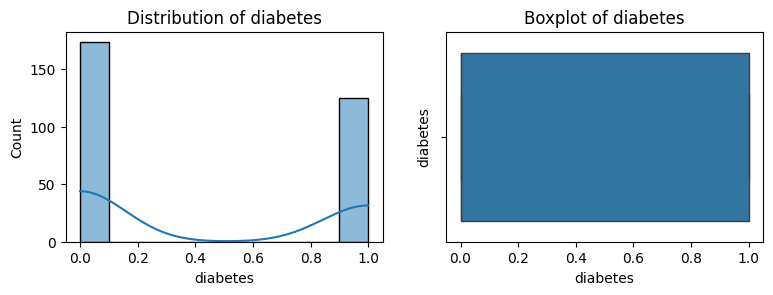

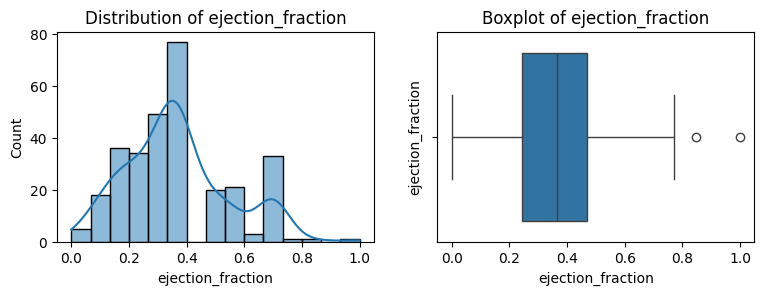

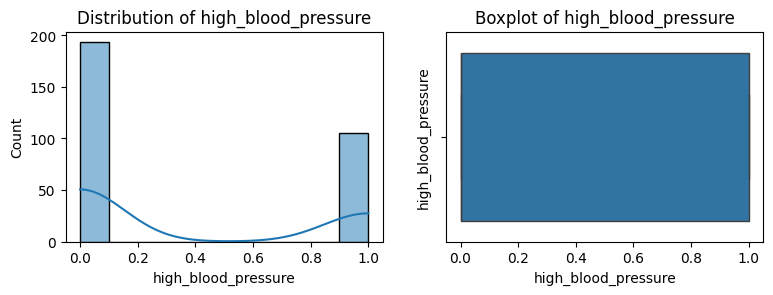

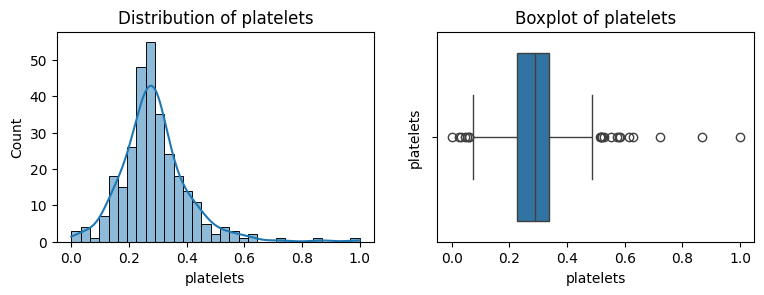

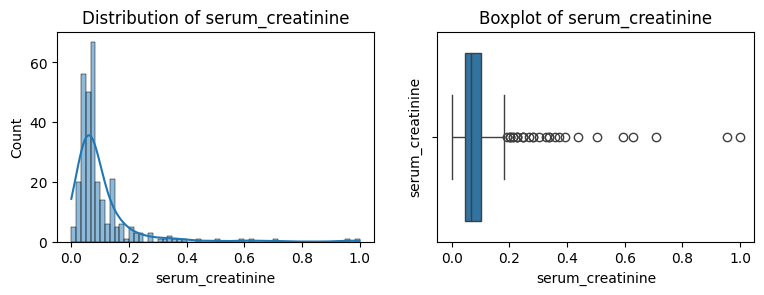

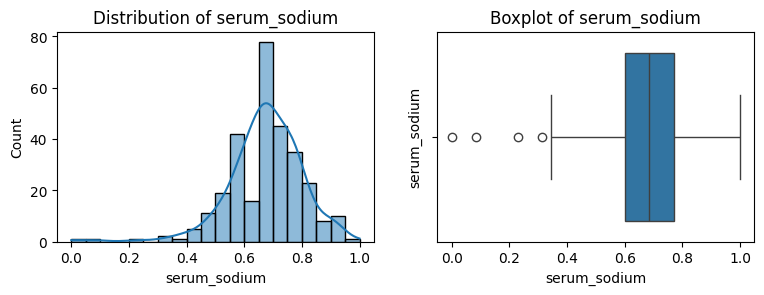

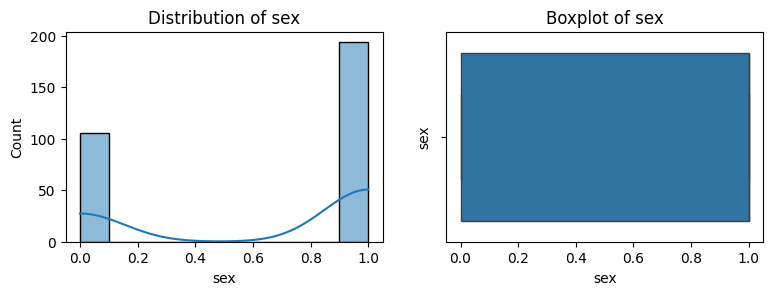

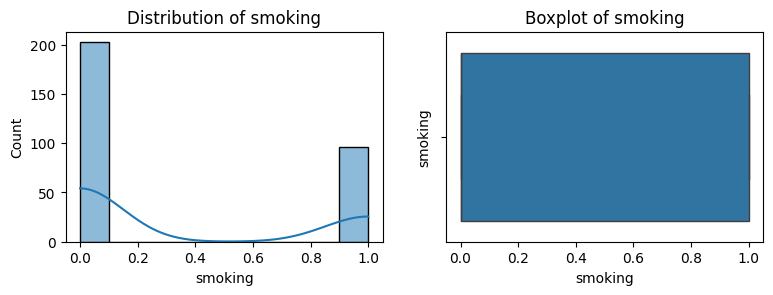

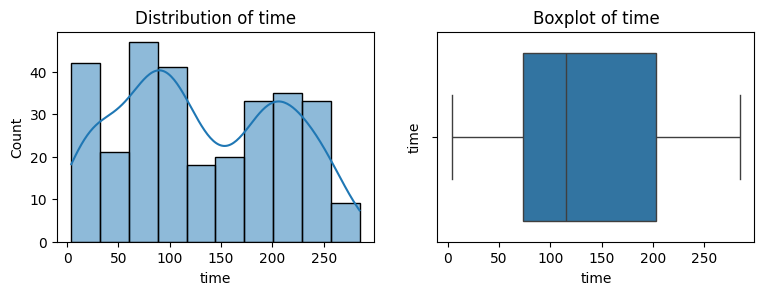

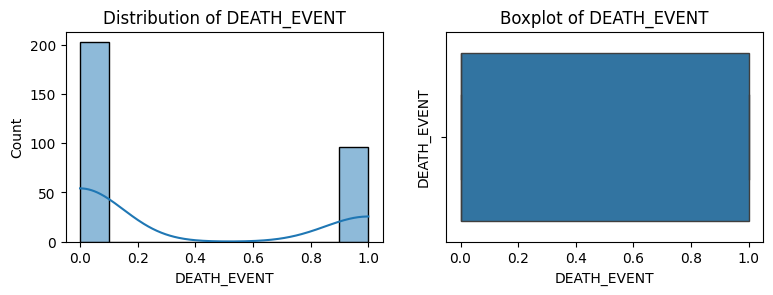

In [18]:
for column in heart_df.columns:
    if heart_df[column].dtype != "object":
        plt.figure(figsize = (9,6))
        plt.subplot(2,2,1)
        sns.histplot(data = heart_df, x = column, kde = True)
        plt.title(f"Distribution of {column}")
        plt.subplot(2,2,2)
        sns.boxplot(data = heart_df, x = column )
        plt.ylabel(column)
        plt.title(f"Boxplot of {column}")


    

In [3]:
#metoda PCA do analizy glownych skladowych

pca = PCA(n_components = 2)
heart_2d_pca = pca.fit_transform(heart_df)

heart_2d_df = pd.DataFrame(heart_2d_pca, 
                          columns=["pca_0", "pca_1"])
heart_2d_df

,pca_0,pca_1
0,-126.682216,9.728431
1,-123.980173,-10.191057
2,-123.331991,-0.161134
3,-122.806225,-15.149483
4,-122.333149,-0.130634
...,...,...
294,139.611867,6.070950
295,140.858161,-0.890739
296,148.205077,-10.642459
297,150.203327,-10.564896


In [4]:
colors=heart_df["DEATH_EVENT"]

<Axes: xlabel='pca_0', ylabel='pca_1'>

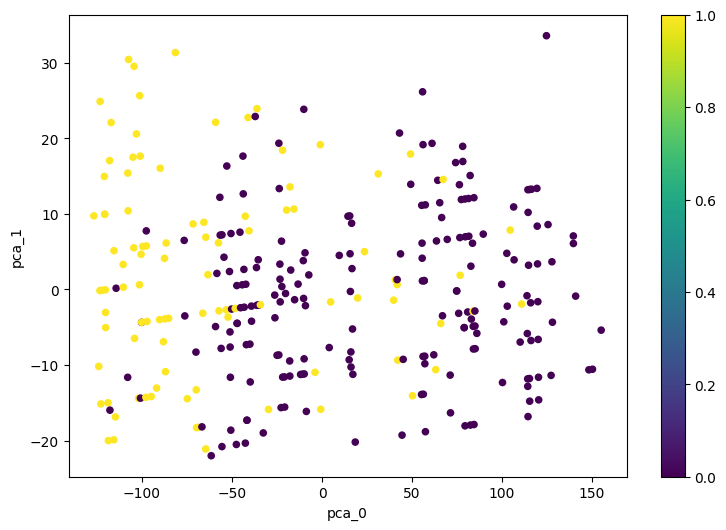

In [5]:

# Tworzenie wykresu PCA z kolorowaniem w zależności od DEATH_EVENT
heart_2d_df.plot.scatter(x = 'pca_0', y = 'pca_1', c = colors, 
                        cmap = 'viridis',figsize = (9,6), colorbar = True)


In [20]:
#metoda TSNE

tsne = TSNE(n_components = 2)

heart_2d_tsne = tsne.fit_transform(heart_df)

heart_2d_tsne_df = pd.DataFrame(heart_2d_tsne, columns = ["tsne_0", "tsne_1"])

heart_2d_tsne_df

,tsne_0,tsne_1
0,-30.314573,-1.038979
1,-29.755152,1.651335
2,-30.098036,0.293692
3,-29.519760,2.246891
4,-29.902769,0.193641
...,...,...
294,36.723183,-0.021677
295,36.764259,-0.629366
296,37.153038,-1.314639
297,37.333313,-1.221708


<Axes: xlabel='tsne_0', ylabel='tsne_1'>

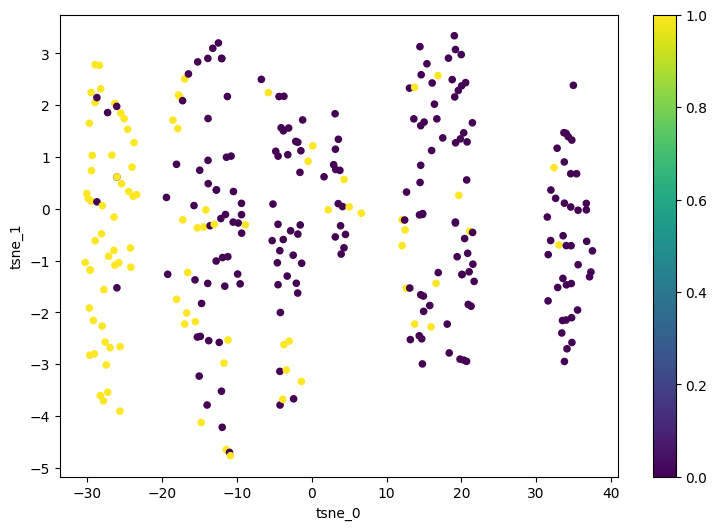

In [21]:
heart_2d_tsne_df.plot.scatter(x = "tsne_0", y = "tsne_1", 
                             c = colors, cmap = "viridis", figsize =(9,6), colorbar = True)

<Axes: >

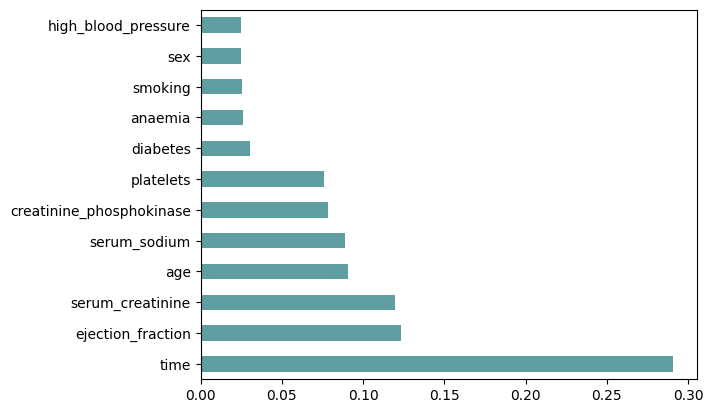

In [4]:
#zmienne niezalezne
x = heart_df.drop(columns = ["DEATH_EVENT"])
#zmienna zalezna (objasniana)
y = heart_df.iloc[:,-1]


model = ExtraTreesClassifier()
model.fit(x,y)

importances = pd.Series(model.feature_importances_, index = x.columns)

importances.nlargest(12).plot(kind="barh", color = "cadetblue")

In [53]:
#knn
y = heart_df["DEATH_EVENT"]
X = heart_df.drop(columns = "DEATH_EVENT")
knn = KNeighborsClassifier(n_neighbors = 48)

In [54]:
#dzielenie danych
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12, shuffle = True)

print('Wymiar x_train dataset: ', x_train.shape)
print('Wymiar x_test dataset: ', x_test.shape)
print('Wymiar y_train dataset: ', y_train.shape)
print('Wymiar y_test dataset: ', y_test.shape)


Wymiar x_train dataset:  (239, 12)
Wymiar x_test dataset:  (60, 12)
Wymiar y_train dataset:  (239,)
Wymiar y_test dataset:  (60,)


In [55]:
#sprawdzamy jaka wartosc n bedzie najlepsza dla naszego modelu dla metryki precision
param_grid = {'n_neighbors': np.arange(1, 50)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='precision')

grid_search.fit(x_train, y_train)
grid_search.best_params_

{'n_neighbors': 48}

In [56]:

knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
y_pred
#dokladnosc
accuracy = accuracy_score(y_test,y_pred)
c_matrix = confusion_matrix(y_test, y_pred)
print(c_matrix)
print(classification_report(y_test,y_pred))

[[38  1]
 [ 6 15]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.92        39
           1       0.94      0.71      0.81        21

    accuracy                           0.88        60
   macro avg       0.90      0.84      0.86        60
weighted avg       0.89      0.88      0.88        60



In [58]:
#ZASTOSOWANIE PCA DLA ALGORYTMU KNN---------------------------------------


y = heart_df["DEATH_EVENT"]
X = heart_df.drop(columns = "DEATH_EVENT")
knn = KNeighborsClassifier(n_neighbors = 48)


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12, shuffle = True)
# knn dla danych PCA


pca = PCA(n_components = 2)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

knn.fit(x_train_pca, y_train)

y_pred = knn.predict(x_test_pca)
print(classification_report(y_test,y_pred))

param_grid = {'n_neighbors': np.arange(1, 50)}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='precision')

grid_search.fit(x_train, y_train)
grid_search.best_params_

              precision    recall  f1-score   support

           0       0.86      0.97      0.92        39
           1       0.94      0.71      0.81        21

    accuracy                           0.88        60
   macro avg       0.90      0.84      0.86        60
weighted avg       0.89      0.88      0.88        60



{'n_neighbors': 48}

In [49]:
#ZASTOSOWANIE TSNE DLA KNN

y = heart_df["DEATH_EVENT"]
X = heart_df.drop(columns = "DEATH_EVENT")
knn = KNeighborsClassifier(n_neighbors = 48)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12, shuffle = True)

#łaczymy dane treningowe i testowe aby przeprowadzic tsne na calym zestawie
X_combined = np.vstack((x_train, x_test))


tsne = TSNE(n_components=2, random_state=13)
X_combined_tsne = tsne.fit_transform(X_combined)

#rozdzielamy wczesniej polaczone dane 
x_train_tsne = X_combined_tsne[:len(x_train)]
x_test_tsne = X_combined_tsne[len(x_train):]

knn = KNeighborsClassifier(n_neighbors=28)
knn.fit(x_train_tsne, y_train)


y_pred = knn.predict(x_test_tsne)


print(classification_report(y_test, y_pred))
#Grid search dla sprawdzenia najelpszych wartosci dla knn

param_grid = {'n_neighbors': np.arange(1, 50)}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='precision')

grid_search.fit(x_train, y_train)
grid_search.best_params_

              precision    recall  f1-score   support

           0       0.86      0.97      0.92        39
           1       0.94      0.71      0.81        21

    accuracy                           0.88        60
   macro avg       0.90      0.84      0.86        60
weighted avg       0.89      0.88      0.88        60



{'n_neighbors': 48}

In [35]:
#REGRESJA LOGISTYCZNA
#zmienna zalezna
y = heart_df["DEATH_EVENT"]
#zmienne niezalezne
X = heart_df.drop(columns = "DEATH_EVENT")

lr = LogisticRegression(class_weight='balanced', max_iter = 10000)

lr.fit(x_train, y_train)
#stosujemy walidacje krzyzowa w celu oceny wydajnosci modelu
scores = cross_validate(lr, X, y, cv = 5, return_train_score = True,
                       scoring = ("accuracy", "f1", "precision","recall"))

y_pred = lr.predict(x_test)
print(classification_report(y_test, y_pred, zero_division=1))
scores

#nieproporcjonalnie klasy prowadzza do wystepowania bledu, z powodu wystepowania mniejszej ilosci klasy 1


              precision    recall  f1-score   support

           0       0.97      0.78      0.87        46
           1       0.57      0.93      0.70        14

    accuracy                           0.82        60
   macro avg       0.77      0.86      0.79        60
weighted avg       0.88      0.82      0.83        60



C:\Users\kapik\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'fit_time': array([0.03125191, 0.04687786, 0.03125191, 0.04686689, 0.04687834]),
 'score_time': array([0.01562595, 0.        , 0.01562643, 0.01562595, 0.01562595]),
 'test_accuracy': array([0.38333333, 0.6       , 0.95      , 0.93333333, 0.6779661 ]),
 'train_accuracy': array([0.79916318, 0.78661088, 0.76150628, 0.75732218, 0.89166667]),
 'test_f1': array([0.51948052, 0.61290323, 0.92307692, 0.88888889, 0.        ]),
 'train_f1': array([0.71084337, 0.70175439, 0.6779661 , 0.67045455, 0.83950617]),
 'test_precision': array([0.35087719, 0.44186047, 0.9       , 0.94117647, 0.        ]),
 'train_precision': array([0.65555556, 0.63829787, 0.6       , 0.5959596 , 0.8       ]),
 'test_recall': array([1.        , 1.        , 0.94736842, 0.84210526, 0.        ]),
 'train_recall': array([0.77631579, 0.77922078, 0.77922078, 0.76623377, 0.88311688])}

In [21]:
# Wykorzystanie pca dla regresji logistycznej


y = heart_df["DEATH_EVENT"]
X = heart_df.drop(columns = "DEATH_EVENT")


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123, shuffle = True)

pca = PCA(n_components = 2)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

lr = LogisticRegression(penalty = 'l2', max_iter = 100, C= 0.001)
lr.fit(x_train_pca, y_train)

y_pred = lr.predict(x_test_pca)
report_pca = classification_report(y_test, y_pred)

print('Classification Report:\n', report_pca)




Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.94      0.84        35
           1       0.88      0.56      0.68        25

    accuracy                           0.78        60
   macro avg       0.81      0.75      0.76        60
weighted avg       0.80      0.78      0.77        60



In [22]:
#tsne dla regresji

y = heart_df["DEATH_EVENT"]
X = heart_df.drop(columns = "DEATH_EVENT")


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123, shuffle = True)

X_combined = np.vstack((x_train, x_test))

tsne = TSNE(n_components = 2)
X_combined_tsne = tsne.fit_transform(X_combined)

x_train_tsne = X_combined[:len(x_train)]
x_test_tsne = X_combined[len(x_train):]

lr = LogisticRegression(penalty = None, max_iter = 10000)
lr.fit(x_train_tsne, y_train)

y_pred = lr.predict(x_test_tsne)
report_tsn = classification_report(y_test, y_pred)

print('Classification Report:\n', report_tsn)

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86        35
           1       0.86      0.72      0.78        25

    accuracy                           0.83        60
   macro avg       0.84      0.82      0.82        60
weighted avg       0.84      0.83      0.83        60



In [45]:
#metoda SVM

y = heart_df['DEATH_EVENT']
X = heart_df.drop(columns = 'DEATH_EVENT')

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12, shuffle = True)

model_svm = SVC(kernel = 'rbf', C = 1.0,gamma = 'scale')

model_svm.fit(x_train, y_train)

y_pred = model_svm.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
raport = classification_report(y_test, y_pred)


print("Classification Report:\n", raport)

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.92        39
           1       0.94      0.71      0.81        21

    accuracy                           0.88        60
   macro avg       0.90      0.84      0.86        60
weighted avg       0.89      0.88      0.88        60



precyzja 86 % przypadkow zaklasyfikowanych jako przetrwanie bylo poprawnych, a 94% przypadkow zaklasyfikowanych jako zgon bylo poprawnych

f1-score dla klasy 0 wynosi 92% natomiast dla klasy 1 wynosi 81%


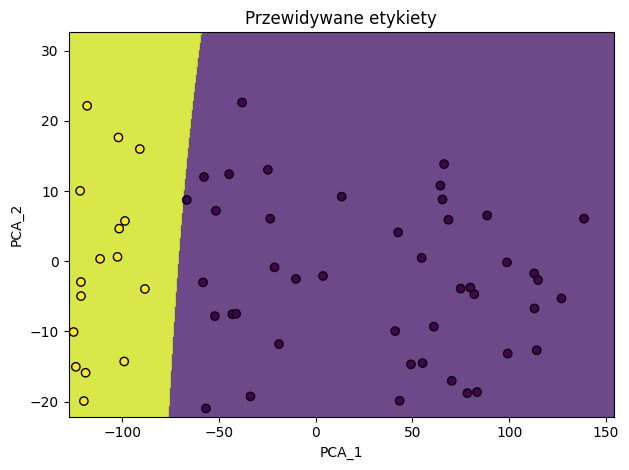

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.92        39
           1       0.94      0.71      0.81        21

    accuracy                           0.88        60
   macro avg       0.90      0.84      0.86        60
weighted avg       0.89      0.88      0.88        60



In [23]:
# ZASTOSOWANIE PCA DLA SVM 

y = heart_df['DEATH_EVENT']
X = heart_df.drop(columns = "DEATH_EVENT")

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12, shuffle = True)

pca = PCA(n_components = 2)

x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

model_svm_pca = SVC(kernel = 'rbf', C= 1.0, gamma = 'scale')
model_svm_pca.fit(x_train_pca, y_train)

y_pred_pca = model_svm_pca.predict(x_test_pca)

raport = classification_report(y_test, y_pred_pca)


h = .02
x_min, x_max = x_train_pca[:, 0].min(), x_train_pca[:, 0].max()
y_min, y_max = x_train_pca[:, 1].min() , x_train_pca[:, 1].max() 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = model_svm_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
plt.scatter(x_test_pca[:, 0], x_test_pca[:, 1], c=y_pred_pca, edgecolor='k', marker='o', cmap='viridis')
plt.title("Przewidywane etykiety")
plt.xlabel("PCA_1")
plt.ylabel("PCA_2")

plt.tight_layout()
plt.show()


print("Classification Report:\n", raport)

[[33  6]
 [12  9]]
0.7


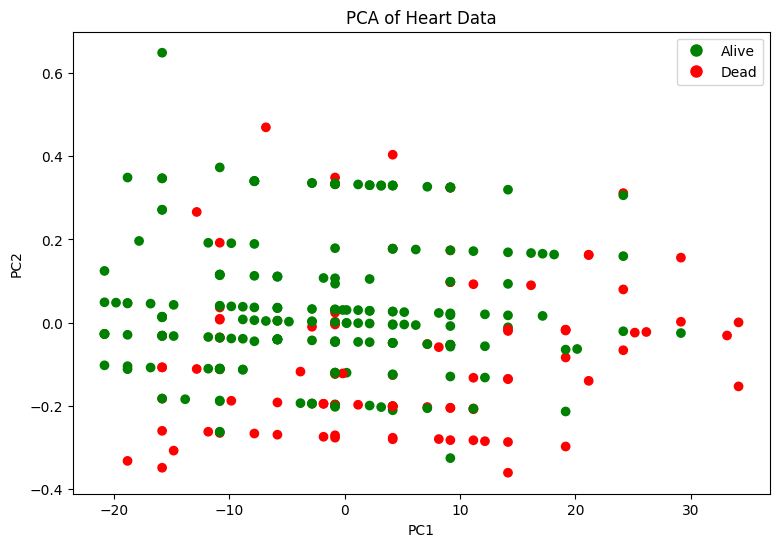

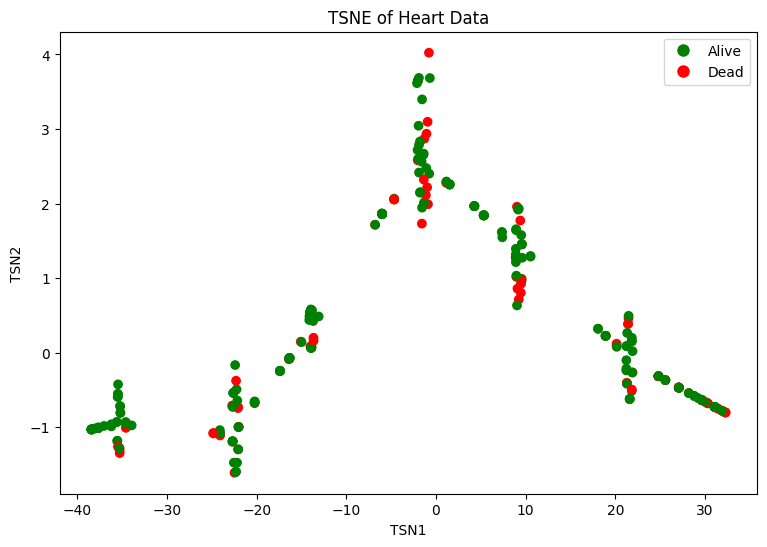

knn raport: 
               precision    recall  f1-score   support

           0       0.73      0.85      0.79        39
           1       0.60      0.43      0.50        21

    accuracy                           0.70        60
   macro avg       0.67      0.64      0.64        60
weighted avg       0.69      0.70      0.69        60



In [22]:
# metody dla zmiennych istotnych

y = heart_df["DEATH_EVENT"] #zmienna zalezna
X = heart_df.drop(columns = (["DEATH_EVENT","sex","anaemia", "high_blood_pressure","smoking","diabetes","creatinine_phosphokinase","platelets","serum_sodium","time"]))

#knn

knn = KNeighborsClassifier(n_neighbors = 5)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12, shuffle = True)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
c_matrix = confusion_matrix(y_test, y_pred)
print(c_matrix)
print(accuracy)
raport = classification_report(y_test, y_pred)
#najlepsza wartosc n dla accuracy

param_grid = {'n_neighbors':np.arange(1,50)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 5, scoring = "accuracy")


#REGRESJA LOGISTYCZNA


lr = LogisticRegression(penalty = 'l2', max_iter = 100, C = 1)
scores = cross_validate(lr, X, y, cv = 5, return_train_score = True,
                       scoring = ('accuracy','f1','precision'))

scores

#PCA

pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X)

heart_df_pca = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
heart_df_pca['DEATH_EVENT'] = y.values

# Wizualizacja wyników PCA
colors = y.map({0: 'green', 1: 'red'}) 
plt.figure(figsize=(9, 6))
plt.scatter(heart_df_pca['PC1'], heart_df_pca['PC2'], c=colors, label=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Heart Data')
plt.legend(handles =[
    plt.Line2D([0], [0], marker = 'o', color ='w', markerfacecolor = 'green', markersize = 10, label = 'Alive'),
    plt.Line2D([0], [0], marker ='o', color = 'w', markerfacecolor = 'red', markersize =10, label = 'Dead'), 
])
plt.show()

#TSNE
tsne = TSNE(n_components=2, random_state=124)
X_tsne = tsne.fit_transform(X)
heart_df_tsne = pd.DataFrame(data=X_tsne, columns=['TSN1', 'TSN2'])
heart_df_tsne['DEATH_EVENT'] = y.values

# Wizualizacja wyników t-SNE
colors = y.map({0: 'green', 1: 'red'})
plt.figure(figsize=(9, 6))
plt.scatter(heart_df_tsne['TSN1'], heart_df_tsne['TSN2'], c=colors)
plt.xlabel('TSN1')
plt.ylabel('TSN2')
plt.title('TSNE of Heart Data')
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Alive'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Dead')
])
plt.show()



x_train_pca = pca.fit(x_train)
x_test_pca = pca.fit(x_test)
print('knn raport: \n', raport)



Czas treningu (fit_time) oraz czas oceny (score_time) jest niewielki
Nie wystepuje duze zroznicowanie dla testu f1 


In [16]:
#SIECI NEURONOWE 
y = heart_df["DEATH_EVENT"]
X = heart_df.drop(columns = 'DEATH_EVENT')

# Podział danych na zbiory treningowe (80%) i tymczasowe (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=12)

# Podział zbioru tymczasowego na walidacyjne (10%) i testowe (10%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=12)

model = keras.Sequential([
    keras.layers.Dense(5, activation='tanh'),
    keras.layers.Dense(4, activation='tanh'),
    keras.layers.Dense(3, activation='tanh'),
    keras.layers.Dense(1, activation='linear'),
])

In [17]:
model.compile(optimizer="sgd", 
              loss=TF.losses.BinaryCrossentropy(), 
              metrics=[TF.metrics.BinaryAccuracy(),TF.metrics.MeanAbsoluteError()])



In [18]:
history=model.fit(X ,y, epochs=100, validation_data = (X_val,y_val))

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - binary_accuracy: 0.7068 - loss: 0.9949 - mean_absolute_error: 0.4100 - val_binary_accuracy: 0.5667 - val_loss: 0.7315 - val_mean_absolute_error: 0.4823
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - binary_accuracy: 0.6993 - loss: 0.6251 - mean_absolute_error: 0.4300 - val_binary_accuracy: 0.5667 - val_loss: 0.7024 - val_mean_absolute_error: 0.4690
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - binary_accuracy: 0.7060 - loss: 0.6113 - mean_absolute_error: 0.4207 - val_binary_accuracy: 0.5667 - val_loss: 0.6746 - val_mean_absolute_error: 0.4597
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - binary_accuracy: 0.6802 - loss: 0.6141 - mean_absolute_error: 0.4263 - val_binary_accuracy: 0.5667 - val_loss: 0.6487 - val_mean_absolute_error: 0.4521
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - binary_accuracy: 0.6803 - loss: 0.6067 - mean_absolute_error: 0.4247 - val_binary_accuracy: 0.5667 - val_loss: 0.6411 - val_me

In [86]:
model.fit(X, y, epochs = 400)

Epoch 1/400
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8283 - loss: 0.4716 - mean_absolute_error: 0.3009 
Epoch 2/400
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8141 - loss: 0.4712 - mean_absolute_error: 0.3054 
Epoch 3/400
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8259 - loss: 0.4695 - mean_absolute_error: 0.2891 
Epoch 4/400
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8211 - loss: 0.4654 - mean_absolute_error: 0.2884 
Epoch 5/400
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8092 - loss: 0.4856 - mean_absolute_error: 0.3057 
Epoch 6/400
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8340 - loss: 0.4523 - mean_absolute_error: 0.2779 
Epoch 7/400
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8273 - loss: 0.4640 - mean_absolute_error: 0.2841 
Epoch 8/400
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.7990 - loss: 0.5105 - mean_absolute_error: 0.3069 
Epoch 9/400
10/1

In [87]:
results = model.evaluate(x_test, y_test)
print(results)



2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.8806 - loss: 0.3754 - mean_absolute_error: 0.2500  
[0.37124690413475037, 0.8833333253860474, 0.2481442093849182]


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.8383 - loss: 0.4253 - mean_absolute_error: 0.2465 
[0.4618239104747772, 0.8117154836654663, 0.26481467485427856]


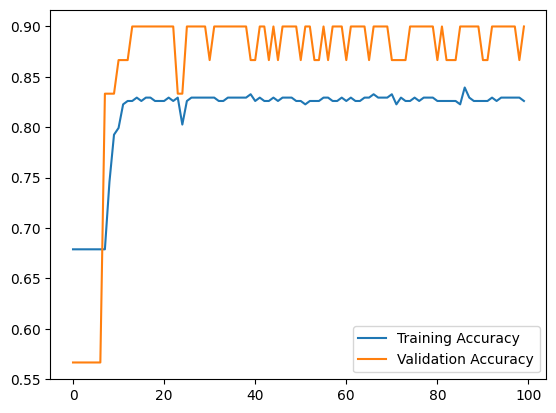

In [31]:
results= model.evaluate(x_train, y_train)
print(results)
plt.plot(history.history['binary_accuracy'], label='Training Accuracy')
plt.plot(history.history['val_binary_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


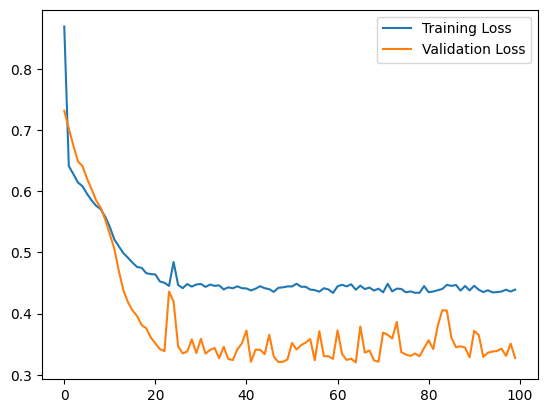

In [32]:

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()